In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
train_identity=pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
train_transaction=pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_identity=pd.read_csv('../input/ieee-fraud-detection/test_identity.csv')
test_transaction=pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')

In [3]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [4]:
test_transaction.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

In [5]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [6]:
test_identity.columns

Index(['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
       'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14',
       'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22',
       'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30',
       'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
print("train_transaction: "+str(train_transaction.shape)+" *** train_identity: "+str(train_identity.shape))
print("test_transaction: "+str(test_transaction.shape)+" *** test_identity: "+str(test_identity.shape))

train_transaction: (590540, 394) *** train_identity: (144233, 41)
test_transaction: (506691, 393) *** test_identity: (141907, 41)


# Conclusion: 
### since train/test_transaction and train/test_identity have different number of rows after merging these two datasets together we woulg have 41 null features for 590540-144233 of our data, therefore we omit those rows.

In [8]:
#merging train_transacion and train_identity
train_transaction = pd.merge(train_transaction, train_identity, how='left', 
                 on='TransactionID', left_index=True, 
                right_index=True)

In [9]:
#merging test_transacion and test_identity
test_transaction = pd.merge(test_transaction, test_identity, how='left', 
                 on='TransactionID', left_index=True, 
                right_index=True)

In [10]:
train_transaction.shape

(590540, 434)

In [11]:
test_transaction.shape

(506691, 433)

# Train-data stuff

In [12]:
train_transaction=train_transaction.iloc[:144233,:]

In [13]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3131228,0,2970544,59.00,W,9500,321.0,150.0,visa,226.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3131229,0,2970732,67.95,W,7919,194.0,150.0,mastercard,202.0,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3131230,0,2970770,73.00,W,17131,111.0,150.0,mastercard,224.0,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3131231,0,2970806,205.70,W,5986,533.0,150.0,mastercard,224.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [14]:
train_transaction.drop(['TransactionID','ProductCD','id_12'],axis=1,inplace=True)

In [15]:
y=train_transaction.iloc[:,0]
train_transaction.drop(columns='isFraud',inplace=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
144228    0
144229    0
144230    0
144231    0
144232    0
Name: isFraud, Length: 144233, dtype: int64

In [16]:
train_transaction.isnull().sum()

TransactionDT         0
TransactionAmt        0
card1                 0
card2              1943
card3                 3
                  ...  
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
Length: 430, dtype: int64

* **Columns which have more than 50% null values**

In [17]:
d=[]
n=(train_transaction.isnull().sum()/144233)*100
for i,j in enumerate(n):
  if(j>50):
    d.append(i)
    print(i)

10
11
13
29
30
32
33
34
35
36
38
39
40
41
43
44
45
46
47
49
50
51
52
53
54
55
56
57
58
59
60
61
62
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
393
394
397
398
407
410
411
412
413
414
415
416


In [18]:
fields=train_transaction.columns[d]
fields=np.array(fields)
train_transaction.drop(columns=fields,inplace=True)

In [19]:
train_transaction.shape

(144233, 226)

In [20]:
train_transaction.fillna(train_transaction.mean(),inplace=True)

In [21]:
train_transaction.isnull().sum()[train_transaction.isnull().sum()>0]

card4                8
card6                7
P_emaildomain    21581
M6               66384
id_15             3248
id_16            14893
id_28             3255
id_29             3255
id_30            66668
id_31             3951
id_33            70944
id_34            66428
id_35             3248
id_36             3248
id_37             3248
id_38             3248
DeviceType        3423
DeviceInfo       25567
dtype: int64

* **Our  categorical data still have null values**

* **Filling the null values**

In [22]:
print("Before filling: \n"+str(train_transaction.card4.value_counts(normalize=True)*100))
train_transaction.card4.fillna('visa',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.card4.value_counts(normalize=True)*100))

Before filling: 
visa                65.790952
mastercard          29.657133
american express     3.153406
discover             1.398509
Name: card4, dtype: float64

*** 

After filling: 
visa                65.792849
mastercard          29.655488
american express     3.153231
discover             1.398432
Name: card4, dtype: float64


In [23]:
print("Before filling: \n"+str(train_transaction.card6.value_counts(normalize=True)*100))
train_transaction.card6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.card6.value_counts(normalize=True)*100))

Before filling: 
debit              65.981862
credit             34.007738
debit or credit     0.006934
charge card         0.003467
Name: card6, dtype: float64

*** 

After filling: 
debit              65.981433
credit             34.008167
debit or credit     0.006933
charge card         0.003467
Name: card6, dtype: float64


In [24]:
print("Before filling: \n"+str(train_transaction.P_emaildomain.value_counts(normalize=True)*100))
train_transaction.P_emaildomain.fillna('gmail.com',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.P_emaildomain.value_counts(normalize=True)*100))

Before filling: 
gmail.com           43.777517
yahoo.com           18.687017
hotmail.com         10.087891
anonymous.com        9.323126
aol.com              5.677853
comcast.net          2.033395
icloud.com           1.084369
msn.com              0.975932
outlook.com          0.957995
att.net              0.815315
sbcglobal.net        0.758243
verizon.net          0.690572
live.com             0.601702
bellsouth.net        0.498157
me.com               0.441901
ymail.com            0.428856
cox.net              0.415811
yahoo.com.mx         0.359554
charter.net          0.261716
optonline.net        0.235626
live.com.mx          0.176108
mac.com              0.158986
rocketmail.com       0.126374
earthlink.net        0.113329
outlook.es           0.091315
mail.com             0.084793
roadrunner.com       0.080716
juno.com             0.078270
embarqmail.com       0.072563
gmail                0.067671
windstream.net       0.064410
twc.com              0.057072
frontier.com         0.

In [25]:
print("Before filling: \n"+str(train_transaction.M6.value_counts(normalize=True)*100))
train_transaction.M6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.M6.value_counts(normalize=True)*100))

Before filling: 
F    53.547252
T    46.452748
Name: M6, dtype: float64

*** 

After filling: 
F    53.537679
T    46.462321
Name: M6, dtype: float64


In [26]:
print("Before filling: \n"+str(train_transaction.DeviceType.value_counts(normalize=True)*100))
train_transaction.DeviceType.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.DeviceType.value_counts(normalize=True)*100))

Before filling: 
desktop    60.48221
mobile     39.51779
Name: DeviceType, dtype: float64

*** 

After filling: 
desktop    60.513197
mobile     39.486803
Name: DeviceType, dtype: float64


In [27]:
print("Before filling: \n"+str(train_transaction.DeviceInfo.value_counts(normalize=True)*100))
train_transaction.DeviceInfo.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.DeviceInfo.value_counts(normalize=True)*100))

Before filling: 
Windows                     40.215394
iOS Device                  16.670318
MacOS                       10.595284
Trident/7.0                  6.269698
rv:11.0                      1.601975
                              ...    
SM-G386W                     0.000843
SM-A520F Build/R16NW         0.000843
Moto G Play Build/NJH47F     0.000843
SM-G928F                     0.000843
LGL33L/V100                  0.000843
Name: DeviceInfo, Length: 1786, dtype: float64

*** 

After filling: 
Windows        40.169725
iOS Device     16.351320
MacOS          10.324267
Trident/7.0     6.129665
rv:11.0         1.578002
                 ...    
A37f            0.000693
SM-T705         0.000693
VS880PP         0.000693
VK815           0.000693
CAM-L23         0.000693
Name: DeviceInfo, Length: 1786, dtype: float64


In [28]:
print("Before filling: \n"+str(train_transaction.id_15.value_counts(normalize=True)*100))
train_transaction.id_15.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_15.value_counts(normalize=True)*100))

Before filling: 
Found      48.039153
New        43.701103
Unknown     8.259744
Name: id_15, dtype: float64

*** 

After filling: 
Found      48.006351
New        43.722310
Unknown     8.271339
Name: id_15, dtype: float64


In [29]:
print("Before filling: \n"+str(train_transaction.id_16.value_counts(normalize=True)*100))
train_transaction.id_16.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_16.value_counts(normalize=True)*100))

Before filling: 
Found       51.2788
NotFound    48.7212
Name: id_16, dtype: float64

*** 

After filling: 
Found       51.114516
NotFound    48.885484
Name: id_16, dtype: float64


In [30]:
print("Before filling: \n"+str(train_transaction.id_28.value_counts(normalize=True)*100))
train_transaction.id_28.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_28.value_counts(normalize=True)*100))

Before filling: 
Found    54.073685
New      45.926315
Name: id_28, dtype: float64

*** 

After filling: 
Found    54.047964
New      45.952036
Name: id_28, dtype: float64


In [31]:
print("Before filling: \n"+str(train_transaction.id_29.value_counts(normalize=True)*100))
train_transaction.id_29.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_29.value_counts(normalize=True)*100))

Before filling: 
Found       53.1473
NotFound    46.8527
Name: id_29, dtype: float64

*** 

After filling: 
Found       53.120992
NotFound    46.879008
Name: id_29, dtype: float64


In [32]:
print("Before filling: \n"+str(train_transaction.id_30.value_counts(normalize=True)*100))
train_transaction.id_30.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_30.value_counts(normalize=True)*100))

Before filling: 
Windows 10          27.273899
Windows 7           16.901953
iOS 11.2.1           4.798556
iOS 11.1.2           4.768904
Android 7.0          3.701412
                      ...    
func                 0.012892
iOS 11.4.0           0.006446
Mac OS X 10_13_5     0.005157
Windows              0.003868
iOS 11.4.1           0.001289
Name: id_30, Length: 75, dtype: float64

*** 

After filling: 
Windows 10          26.441244
Windows 7           15.964446
iOS 11.2.1           4.546116
iOS 11.1.2           3.945699
Android 7.0          3.587251
                      ...    
other                0.017333
Mac OS X 10_13_5     0.012480
func                 0.007627
iOS 11.4.0           0.006240
iOS 11.4.1           0.000693
Name: id_30, Length: 75, dtype: float64


In [33]:
print("Before filling: \n"+str(train_transaction.id_31.value_counts(normalize=True)*100))
train_transaction.id_31.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_31.value_counts(normalize=True)*100))

Before filling: 
chrome 63.0                15.682696
mobile safari 11.0          9.568583
mobile safari generic       8.179239
ie 11.0 for desktop         6.437034
safari generic              5.841804
                             ...    
chromium                    0.000713
seamonkey                   0.000713
cyberfox                    0.000713
chrome 67.0 for android     0.000713
M4Tel/M4                    0.000713
Name: id_31, Length: 130, dtype: float64

*** 

After filling: 
chrome 63.0                15.639971
mobile safari 11.0          9.573399
mobile safari generic       8.152087
ie 11.0 for desktop         6.426407
safari generic              5.818363
                             ...    
chromium                    0.000693
seamonkey                   0.000693
cyberfox                    0.000693
chrome 67.0 for android     0.000693
M4Tel/M4                    0.000693
Name: id_31, Length: 130, dtype: float64


In [34]:
print("Before filling: \n"+str(train_transaction.id_33.value_counts(normalize=True)*100))
train_transaction.id_33.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_33.value_counts(normalize=True)*100))

Before filling: 
1920x1080    23.023919
1366x768     11.741189
1334x750      8.796682
2208x1242     6.685860
1440x900      5.981798
               ...    
2159x1440     0.001364
4499x2999     0.001364
768x576       0.001364
1281x800      0.001364
7500x5000     0.001364
Name: id_33, Length: 260, dtype: float64

*** 

After filling: 
1920x1080    22.740288
1366x768     11.356624
1334x750      9.081140
2208x1242     6.823681
1440x900      5.857883
               ...    
2160x1350     0.000693
480x320       0.000693
2559x1439     0.000693
1496x844      0.000693
1280x620      0.000693
Name: id_33, Length: 260, dtype: float64


In [35]:
print("Before filling: \n"+str(train_transaction.id_34.value_counts(normalize=True)*100))
train_transaction.id_34.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_34.value_counts(normalize=True)*100))

Before filling: 
match_status:2     77.130004
match_status:1     22.332755
match_status:0      0.533385
match_status:-1     0.003856
Name: id_34, dtype: float64

*** 

After filling: 
match_status:2     76.775773
match_status:1     22.745142
match_status:0      0.474926
match_status:-1     0.004160
Name: id_34, dtype: float64


In [36]:
print("Before filling: \n"+str(train_transaction.id_35.value_counts(normalize=True)*100))
train_transaction.id_35.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_35.value_counts(normalize=True)*100))

Before filling: 
T    55.193106
F    44.806894
Name: id_35, dtype: float64

*** 

After filling: 
T    55.20096
F    44.79904
Name: id_35, dtype: float64


In [37]:
print("Before filling: \n"+str(train_transaction.id_36.value_counts(normalize=True)*100))
train_transaction.id_36.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_36.value_counts(normalize=True)*100))

Before filling: 
F    95.092386
T     4.907614
Name: id_36, dtype: float64

*** 

After filling: 
F    95.098902
T     4.901098
Name: id_36, dtype: float64


In [38]:
print("Before filling: \n"+str(train_transaction.id_37.value_counts(normalize=True)*100))
train_transaction.id_37.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_37.value_counts(normalize=True)*100))

Before filling: 
T    78.343086
F    21.656914
Name: id_37, dtype: float64

*** 

After filling: 
T    78.365561
F    21.634439
Name: id_37, dtype: float64


In [39]:
print("Before filling: \n"+str(train_transaction.id_38.value_counts(normalize=True)*100))
train_transaction.id_38.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.id_38.value_counts(normalize=True)*100))

Before filling: 
F    52.432528
T    47.567472
Name: id_38, dtype: float64

*** 

After filling: 
F    52.458175
T    47.541825
Name: id_38, dtype: float64


In [40]:
train_transaction.isnull().sum()[train_transaction.isnull().sum()>0]

Series([], dtype: int64)

In [41]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

card4=pd.Series(label_encoder.fit_transform(train_transaction.card4))
card6=pd.Series(label_encoder.fit_transform(train_transaction.card6))
P_emaildomain=pd.Series(label_encoder.fit_transform(train_transaction.P_emaildomain))
M6=pd.Series(label_encoder.fit_transform(train_transaction.M6))
DeviceType=pd.Series(label_encoder.fit_transform(train_transaction.DeviceType))
DeviceInfo=pd.Series(label_encoder.fit_transform(train_transaction.DeviceInfo))
id_15=pd.Series(label_encoder.fit_transform(train_transaction.id_15))
id_16=pd.Series(label_encoder.fit_transform(train_transaction.id_16))
id_28=pd.Series(label_encoder.fit_transform(train_transaction.id_28))
id_29=pd.Series(label_encoder.fit_transform(train_transaction.id_29))
id_30=pd.Series(label_encoder.fit_transform(train_transaction.id_30))
id_31=pd.Series(label_encoder.fit_transform(train_transaction.id_31))
id_33=pd.Series(label_encoder.fit_transform(train_transaction.id_33))
id_34=pd.Series(label_encoder.fit_transform(train_transaction.id_34))
id_35=pd.Series(label_encoder.fit_transform(train_transaction.id_35))
id_36=pd.Series(label_encoder.fit_transform(train_transaction.id_36))
id_37=pd.Series(label_encoder.fit_transform(train_transaction.id_37))
id_38=pd.Series(label_encoder.fit_transform(train_transaction.id_38))

train_transaction.drop(['card4','card6','M6','P_emaildomain','DeviceType','DeviceInfo','id_15','id_16','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38'], axis=1,inplace=True)

In [42]:
card4=pd.DataFrame(card4,columns=['card4'])
card6=pd.DataFrame(card6,columns=['card6'])
P_emaildomain=pd.DataFrame(P_emaildomain,columns=['P_emaildomain'])
M6=pd.DataFrame(M6,columns=['M6'])
DeviceType=pd.DataFrame(DeviceType,columns=['DeviceType'])
DeviceInfo=pd.DataFrame(DeviceInfo,columns=['DeviceInfo'])
id_15=pd.DataFrame(id_15,columns=['id_15'])
id_16=pd.DataFrame(id_16,columns=['id_16'])
id_28=pd.DataFrame(id_28,columns=['id_28'])
id_29=pd.DataFrame(id_29,columns=['id_29'])
id_30=pd.DataFrame(id_30,columns=['id_30'])
id_31=pd.DataFrame(id_31,columns=['id_31'])
id_33=pd.DataFrame(id_33,columns=['id_33'])
id_34=pd.DataFrame(id_34,columns=['id_34'])
id_35=pd.DataFrame(id_35,columns=['id_35'])
id_36=pd.DataFrame(id_36,columns=['id_36'])
id_37=pd.DataFrame(id_37,columns=['id_37'])
id_38=pd.DataFrame(id_38,columns=['id_38'])

train_transaction=pd.concat([train_transaction,card4,card6,M6,P_emaildomain,DeviceType,DeviceInfo,id_15,id_16,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38],axis=1)

In [43]:
train_transaction.select_dtypes(include=['object'])

""
0
1
2
3
4
...
144228
144229
144230
144231


In [44]:
train_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
0,86400,68.50,13926,370.624808,150.0,142.0,315.0,87.0,1.0,1.0,...,1,1,7,123,164,3,1,0,1,1
1,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,...,1,1,63,98,48,2,1,0,0,1
2,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,...,0,0,63,44,48,2,0,0,1,1
3,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,...,1,1,63,44,48,2,0,0,1,1
4,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,...,0,0,24,44,40,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,2970544,59.00,9500,321.000000,150.0,226.0,126.0,87.0,3.0,2.0,...,0,0,43,57,98,3,0,0,1,0
144229,2970732,67.95,7919,194.000000,150.0,202.0,181.0,87.0,102.0,100.0,...,1,1,8,31,255,3,1,0,1,0
144230,2970770,73.00,17131,111.000000,150.0,224.0,264.0,87.0,24.0,20.0,...,1,1,8,54,255,3,0,0,1,0
144231,2970806,205.70,5986,533.000000,150.0,224.0,343.0,87.0,4.0,6.0,...,0,0,40,56,183,3,1,0,1,0


In [45]:
normalized = preprocessing.normalize(train_transaction)

In [46]:
train_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
0,86400,68.50,13926,370.624808,150.0,142.0,315.0,87.0,1.0,1.0,...,1,1,7,123,164,3,1,0,1,1
1,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,...,1,1,63,98,48,2,1,0,0,1
2,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,...,0,0,63,44,48,2,0,0,1,1
3,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,...,1,1,63,44,48,2,0,0,1,1
4,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,...,0,0,24,44,40,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,2970544,59.00,9500,321.000000,150.0,226.0,126.0,87.0,3.0,2.0,...,0,0,43,57,98,3,0,0,1,0
144229,2970732,67.95,7919,194.000000,150.0,202.0,181.0,87.0,102.0,100.0,...,1,1,8,31,255,3,1,0,1,0
144230,2970770,73.00,17131,111.000000,150.0,224.0,264.0,87.0,24.0,20.0,...,1,1,8,54,255,3,0,0,1,0
144231,2970806,205.70,5986,533.000000,150.0,224.0,343.0,87.0,4.0,6.0,...,0,0,40,56,183,3,1,0,1,0


# Test-data stuff

In [47]:
test_transaction=test_transaction.iloc[:144233,:]

In [48]:
test_transaction.shape

(144233, 433)

In [49]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3807777,23405703,107.95,W,12544,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144229,3807778,23405706,275.00,W,12577,268.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144230,3807779,23405732,82.95,W,18006,543.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144231,3807780,23405743,34.00,W,13780,298.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
test_transaction.drop(['TransactionID','ProductCD','id-12'],axis=1,inplace=True)

* We delete the same columns as we deleted in the test_transaction

In [51]:
fields=test_transaction.columns[d]
fields=np.array(fields)
test_transaction.drop(columns=fields,inplace=True)

In [52]:
test_transaction.shape

(144233, 226)

In [53]:
n=(train_transaction.isnull().sum()/506691)*100
for i,j in enumerate(n):
  if(j>50):
    print(i)
  else:
    print('Nothing left.')
    break

Nothing left.


### Conclusion: the same fields as train_transaction had more than 50% null values

In [54]:
test_transaction.fillna(test_transaction.mean(),inplace=True)

In [55]:
test_transaction.isnull().sum()[test_transaction.isnull().sum()>0]

card4             1346
card6             1308
P_emaildomain    21654
M6               31362
id-15             7256
id-16            18486
id-28             7455
id-29             7455
id-30            73574
id-31             7608
id-33            73562
id-34            72058
id-35             7256
id-36             7256
id-37             7256
id-38             7256
DeviceType        7302
DeviceInfo       29176
dtype: int64

In [56]:
print("Before filling: \n"+str(test_transaction.card4.value_counts(normalize=True)*100))
test_transaction.card4.fillna('visa',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.card4.value_counts(normalize=True)*100))

Before filling: 
visa                66.572886
mastercard          31.944124
american express     1.053280
discover             0.429710
Name: card4, dtype: float64

*** 

After filling: 
visa                66.884832
mastercard          31.646017
american express     1.043451
discover             0.425700
Name: card4, dtype: float64


In [57]:
print("Before filling: \n"+str(test_transaction.card6.value_counts(normalize=True)*100))
test_transaction.card6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.card6.value_counts(normalize=True)*100))

Before filling: 
debit          78.286514
credit         21.712786
charge card     0.000700
Name: card6, dtype: float64

*** 

After filling: 
debit          77.964127
credit         22.035179
charge card     0.000693
Name: card6, dtype: float64


In [58]:
print("Before filling: \n"+str(test_transaction.P_emaildomain.value_counts(normalize=True)*100))
test_transaction.P_emaildomain.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.P_emaildomain.value_counts(normalize=True)*100))

Before filling: 
gmail.com           47.736562
yahoo.com           20.652803
hotmail.com          7.452337
anonymous.com        6.981620
aol.com              5.966764
comcast.net          1.505968
icloud.com           1.408887
outlook.com          0.987934
att.net              0.873722
msn.com              0.786432
sbcglobal.net        0.603692
live.com             0.586561
verizon.net          0.546586
ymail.com            0.432374
bellsouth.net        0.360584
cox.net              0.274925
me.com               0.248819
mail.com             0.220266
optonline.net        0.206398
charter.net          0.155002
yahoo.com.mx         0.147660
gmail                0.119107
earthlink.net        0.107686
live.com.mx          0.092185
hotmail.fr           0.092185
mac.com              0.085659
rocketmail.com       0.082396
web.de               0.080764
windstream.net       0.076685
frontier.com         0.070975
juno.com             0.069343
hotmail.co.uk        0.068527
roadrunner.com       0.

In [59]:
print("Before filling: \n"+str(test_transaction.M6.value_counts(normalize=True)*100))
test_transaction.M6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.M6.value_counts(normalize=True)*100))

Before filling: 
F    54.250427
T    45.749573
Name: M6, dtype: float64

*** 

After filling: 
F    54.208815
T    45.791185
Name: M6, dtype: float64


In [60]:
print("Before filling: \n"+str(test_transaction.DeviceType.value_counts(normalize=True)*100))
test_transaction.DeviceType.fillna(method='bfill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.DeviceType.value_counts(normalize=True)*100))

Before filling: 
desktop    54.336125
mobile     45.663875
Name: DeviceType, dtype: float64

*** 

After filling: 
desktop    54.330653
mobile     45.669347
Name: DeviceType, dtype: float64


In [61]:
print("Before filling: \n"+str(test_transaction.DeviceInfo.value_counts(normalize=True)*100))
test_transaction.DeviceInfo.fillna(method='bfill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.DeviceInfo.value_counts(normalize=True)*100))

Before filling: 
Windows                  39.100620
iOS Device               16.270197
MacOS                     9.689980
Trident/7.0               4.250067
rv:11.0                   0.650982
                           ...    
SM-G930VL                 0.000869
SM-N900                   0.000869
LGL164VL Build/NRD90U     0.000869
LG-V410/V41020e           0.000869
LG-K373                   0.000869
Name: DeviceInfo, Length: 2226, dtype: float64

*** 

After filling: 
Windows               39.072068
iOS Device            16.022465
MacOS                  9.449851
Trident/7.0            4.129465
rv:11.0                0.631399
                        ...    
PSPCL20A0              0.000705
VS986 Build/MRA58K     0.000705
SAMSUNG-SM-G920AZ      0.000705
SM-J510H               0.000705
LG-K373                0.000705
Name: DeviceInfo, Length: 2226, dtype: float64


In [62]:
test_transaction.iloc[:,200:220]

,id-02,id-05,id-06,id-09,id-10,id-11,id-13,id-14,id-15,id-16,id-17,id-19,id-20,id-28,id-29,id-30,id-31,id-32,id-33,id-34
0,280290.000000,0.000000,0.000000,0.076219,-0.245877,100.000000,27.000000,-344.482672,New,NotFound,225.000000,427.000000,563.00000,New,NotFound,NaN,chrome 67.0 for android,26.217939,NaN,NaN
1,3579.000000,0.000000,0.000000,0.000000,0.000000,100.000000,36.905715,-300.000000,Found,Found,166.000000,542.000000,368.00000,Found,Found,Android 6.0.1,chrome 67.0 for android,24.000000,1280x720,match_status:2
2,185210.000000,1.000000,0.000000,0.076219,-0.245877,100.000000,52.000000,-360.000000,New,NotFound,225.000000,271.000000,507.00000,New,NotFound,NaN,ie 11.0 for tablet,26.217939,NaN,NaN
3,252944.000000,0.000000,0.000000,0.000000,0.000000,100.000000,27.000000,-344.482672,Found,Found,225.000000,427.000000,563.00000,Found,Found,NaN,chrome 67.0 for android,26.217939,NaN,NaN
4,328680.000000,7.000000,-33.000000,0.076219,-0.245877,100.000000,27.000000,-344.482672,New,NotFound,225.000000,567.000000,507.00000,New,NotFound,NaN,chrome 67.0 for android,26.217939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144229,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144230,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144231,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN


In [63]:
test_transaction.rename(columns={'id-01':'id_01','id-02':'id_02','id-05':'id_05','id-06':'id_06',
                                 'id-09':'id_09','id-10':'id_10','id-11':'id_11','id-13':'id_13',
                                 'id-14':'id_14','id-15':'id_15','id-16':'id_16','id-17':'id_17',
                                 'id-18':'id_18','id-19':'id_19','id-20':'id_20','id-21':'id_21',
                                 'id-22':'id_22','id-23':'id_23','id-24':'id_24','id-25':'id_25',
                                 'id-26':'id_26','id-27':'id_27','id-28':'id_28','id-29':'id_29',
                                 'id-30':'id_30','id-31':'id_31','id-32':'id_32','id-33':'id_33',
                                 'id-34':'id_34','id-35':'id_35','id-36':'id_36','id-37':'id_37',
                                 'id-38':'id_38'
                                },inplace=True)

test_transaction.iloc[:,200:220]

,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34
0,280290.000000,0.000000,0.000000,0.076219,-0.245877,100.000000,27.000000,-344.482672,New,NotFound,225.000000,427.000000,563.00000,New,NotFound,NaN,chrome 67.0 for android,26.217939,NaN,NaN
1,3579.000000,0.000000,0.000000,0.000000,0.000000,100.000000,36.905715,-300.000000,Found,Found,166.000000,542.000000,368.00000,Found,Found,Android 6.0.1,chrome 67.0 for android,24.000000,1280x720,match_status:2
2,185210.000000,1.000000,0.000000,0.076219,-0.245877,100.000000,52.000000,-360.000000,New,NotFound,225.000000,271.000000,507.00000,New,NotFound,NaN,ie 11.0 for tablet,26.217939,NaN,NaN
3,252944.000000,0.000000,0.000000,0.000000,0.000000,100.000000,27.000000,-344.482672,Found,Found,225.000000,427.000000,563.00000,Found,Found,NaN,chrome 67.0 for android,26.217939,NaN,NaN
4,328680.000000,7.000000,-33.000000,0.076219,-0.245877,100.000000,27.000000,-344.482672,New,NotFound,225.000000,567.000000,507.00000,New,NotFound,NaN,chrome 67.0 for android,26.217939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144229,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144230,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN
144231,192658.729909,1.246033,-6.803829,0.076219,-0.245877,99.750876,36.905715,-344.482672,NaN,NaN,191.070341,350.122982,408.88623,NaN,NaN,NaN,NaN,26.217939,NaN,NaN


In [64]:
print("Before filling: \n"+str(test_transaction.DeviceType.value_counts(normalize=True)*100))
test_transaction.DeviceType.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.DeviceType.value_counts(normalize=True)*100))

Before filling: 
desktop    54.330653
mobile     45.669347
Name: DeviceType, dtype: float64

*** 

After filling: 
desktop    53.45448
mobile     46.54552
Name: DeviceType, dtype: float64


In [65]:
print("Before filling: \n"+str(test_transaction.DeviceInfo.value_counts(normalize=True)*100))
test_transaction.DeviceInfo.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.DeviceInfo.value_counts(normalize=True)*100))

Before filling: 
Windows               39.072068
iOS Device            16.022465
MacOS                  9.449851
Trident/7.0            4.129465
rv:11.0                0.631399
                        ...    
PSPCL20A0              0.000705
VS986 Build/MRA58K     0.000705
SAMSUNG-SM-G920AZ      0.000705
SM-J510H               0.000705
LG-K373                0.000705
Name: DeviceInfo, Length: 2226, dtype: float64

*** 

After filling: 
Windows               38.441965
iOS Device            15.764076
MacOS                  9.297456
Trident/7.0            4.062870
SAMSUNG                1.798479
                        ...    
PSPCL20A0              0.000693
VS986 Build/MRA58K     0.000693
SAMSUNG-SM-G920AZ      0.000693
SM-J510H               0.000693
LG-K373                0.000693
Name: DeviceInfo, Length: 2226, dtype: float64


In [66]:
print("Before filling: \n"+str(test_transaction.id_15.value_counts(normalize=True)*100))
test_transaction.id_15.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_15.value_counts(normalize=True)*100))

Before filling: 
Found      49.615629
New        42.185914
Unknown     8.198457
Name: id_15, dtype: float64

*** 

After filling: 
Found      50.376128
New        41.549437
Unknown     8.074435
Name: id_15, dtype: float64


In [67]:
print("Before filling: \n"+str(test_transaction.id_16.value_counts(normalize=True)*100))
test_transaction.id_16.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_16.value_counts(normalize=True)*100))

Before filling: 
Found       52.868856
NotFound    47.131144
Name: id_16, dtype: float64

*** 

After filling: 
Found       53.611864
NotFound    46.388136
Name: id_16, dtype: float64


In [68]:
print("Before filling: \n"+str(test_transaction.id_28.value_counts(normalize=True)*100))
test_transaction.id_28.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_28.value_counts(normalize=True)*100))

Before filling: 
Found    55.258156
New      44.741844
Name: id_28, dtype: float64

*** 

After filling: 
Found    55.977481
New      44.022519
Name: id_28, dtype: float64


In [69]:
print("Before filling: \n"+str(test_transaction.id_29.value_counts(normalize=True)*100))
test_transaction.id_29.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_29.value_counts(normalize=True)*100))

Before filling: 
Found       54.349384
NotFound    45.650616
Name: id_29, dtype: float64

*** 

After filling: 
Found       55.090721
NotFound    44.909279
Name: id_29, dtype: float64


In [70]:
print("Before filling: \n"+str(test_transaction.id_30.value_counts(normalize=True)*100))
test_transaction.id_30.fillna('Windows 10',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_30.value_counts(normalize=True)*100))

Before filling: 
Windows 10          29.741434
Windows 7           14.673290
iOS 12.1.0           8.985409
iOS 11.4.1           5.007147
Mac OS X 10_13_6     4.605217
                      ...    
func                 0.015568
Mac OS X 10_12       0.011322
other                0.005661
Android 4.4.2        0.005661
Windows              0.004246
Name: id_30, Length: 86, dtype: float64

*** 

After filling: 
Windows 10          65.580692
Windows 7            7.188369
iOS 12.1.0           4.401905
iOS 11.4.1           2.452975
Mac OS X 10_13_6     2.256072
                      ...    
func                 0.007627
Mac OS X 10_12       0.005547
other                0.002773
Android 4.4.2        0.002773
Windows              0.002080
Name: id_30, Length: 86, dtype: float64


In [71]:
print("Before filling: \n"+str(test_transaction.id_31.value_counts(normalize=True)*100))
test_transaction.id_31.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_31.value_counts(normalize=True)*100))

Before filling: 
chrome 70.0                       11.750412
mobile safari 12.0                 9.586825
mobile safari 11.0                 7.489113
chrome 71.0                        6.945288
chrome 69.0                        6.069899
                                    ...    
google search application 49.0     0.002928
palemoon                           0.001464
rim                                0.000732
opera 51.0                         0.000732
blackberry                         0.000732
Name: id_31, Length: 135, dtype: float64

*** 

After filling: 
chrome 70.0                       11.451610
mobile safari 12.0                 9.366788
mobile safari 11.0                 7.368633
chrome 71.0                        6.780695
chrome 69.0                        6.189984
                                    ...    
google search application 49.0     0.002773
palemoon                           0.001387
rim                                0.000693
opera 51.0                         0.00

In [72]:
print("Before filling: \n"+str(test_transaction.id_33.value_counts(normalize=True)*100))
test_transaction.id_33.fillna('1920x1080',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_33.value_counts(normalize=True)*100))

Before filling: 
1920x1080    23.868348
1366x768      9.114064
1334x750      7.220784
2208x1242     5.961427
1440x900      5.296373
               ...    
2559x1080     0.001415
4096x2160     0.001415
2791x1440     0.001415
1268x862      0.001415
1280x801      0.001415
Name: id_33, Length: 390, dtype: float64

*** 

After filling: 
1920x1080    62.697164
1366x768      4.465691
1334x750      3.538025
2208x1242     2.920968
1440x900      2.595107
               ...    
2559x1080     0.000693
4096x2160     0.000693
2791x1440     0.000693
1268x862      0.000693
1280x801      0.000693
Name: id_33, Length: 390, dtype: float64


In [73]:
print("Before filling: \n"+str(test_transaction.id_34.value_counts(normalize=True)*100))
test_transaction.id_34.fillna('match_status:2',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_34.value_counts(normalize=True)*100))

Before filling: 
match_status:2    99.998614
match_status:1     0.001386
Name: id_34, dtype: float64

*** 

After filling: 
match_status:2    99.999307
match_status:1     0.000693
Name: id_34, dtype: float64


In [74]:
print("Before filling: \n"+str(test_transaction.id_35.value_counts(normalize=True)*100))
test_transaction.id_35.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_35.value_counts(normalize=True)*100))

Before filling: 
T    52.308052
F    47.691948
Name: id_35, dtype: float64

*** 

After filling: 
T    51.380752
F    48.619248
Name: id_35, dtype: float64


In [75]:
print("Before filling: \n"+str(test_transaction.id_36.value_counts(normalize=True)*100))
test_transaction.id_36.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_36.value_counts(normalize=True)*100))

Before filling: 
F    97.306117
T     2.693883
Name: id_36, dtype: float64

*** 

After filling: 
F    97.325161
T     2.674839
Name: id_36, dtype: float64


In [76]:
print("Before filling: \n"+str(test_transaction.id_37.value_counts(normalize=True)*100))
test_transaction.id_37.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_37.value_counts(normalize=True)*100))

Before filling: 
T    76.434
F    23.566
Name: id_37, dtype: float64

*** 

After filling: 
T    76.871451
F    23.128549
Name: id_37, dtype: float64


In [77]:
print("Before filling: \n"+str(test_transaction.id_38.value_counts(normalize=True)*100))
test_transaction.id_38.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.id_38.value_counts(normalize=True)*100))

Before filling: 
F    69.397052
T    30.602948
Name: id_38, dtype: float64

*** 

After filling: 
F    69.82244
T    30.17756
Name: id_38, dtype: float64


In [78]:
test_transaction.isnull().sum()[test_transaction.isnull().sum()>0]

Series([], dtype: int64)

In [79]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

card4=pd.Series(label_encoder.fit_transform(test_transaction.card4))
card6=pd.Series(label_encoder.fit_transform(test_transaction.card6))
P_emaildomain=pd.Series(label_encoder.fit_transform(test_transaction.P_emaildomain))
M6=pd.Series(label_encoder.fit_transform(test_transaction.M6))
DeviceType=pd.Series(label_encoder.fit_transform(test_transaction.DeviceType))
DeviceInfo=pd.Series(label_encoder.fit_transform(test_transaction.DeviceInfo))
id_15=pd.Series(label_encoder.fit_transform(test_transaction.id_15))
id_16=pd.Series(label_encoder.fit_transform(test_transaction.id_16))
id_28=pd.Series(label_encoder.fit_transform(test_transaction.id_28))
id_29=pd.Series(label_encoder.fit_transform(test_transaction.id_29))
id_30=pd.Series(label_encoder.fit_transform(test_transaction.id_30))
id_31=pd.Series(label_encoder.fit_transform(test_transaction.id_31))
id_33=pd.Series(label_encoder.fit_transform(test_transaction.id_33))
id_34=pd.Series(label_encoder.fit_transform(test_transaction.id_34))
id_35=pd.Series(label_encoder.fit_transform(test_transaction.id_35))
id_36=pd.Series(label_encoder.fit_transform(test_transaction.id_36))
id_37=pd.Series(label_encoder.fit_transform(test_transaction.id_37))
id_38=pd.Series(label_encoder.fit_transform(test_transaction.id_38))

test_transaction.drop(['card4','card6','M6','P_emaildomain','DeviceType','DeviceInfo','id_15','id_16','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38'], axis=1,inplace=True)

In [80]:
card4=pd.DataFrame(card4,columns=['card4'])
card6=pd.DataFrame(card6,columns=['card6'])
M6=pd.DataFrame(M6,columns=['M6'])
P_emaildomain=pd.DataFrame(P_emaildomain,columns=['P_emaildomain'])
DeviceType=pd.DataFrame(DeviceType,columns=['DeviceType'])
DeviceInfo=pd.DataFrame(DeviceInfo,columns=['DeviceInfo'])
id_15=pd.DataFrame(id_15,columns=['id_15'])
id_16=pd.DataFrame(id_16,columns=['id_16'])
id_28=pd.DataFrame(id_28,columns=['id_28'])
id_29=pd.DataFrame(id_29,columns=['id_29'])
id_30=pd.DataFrame(id_30,columns=['id_30'])
id_31=pd.DataFrame(id_31,columns=['id_31'])
id_33=pd.DataFrame(id_33,columns=['id_33'])
id_34=pd.DataFrame(id_34,columns=['id_34'])
id_35=pd.DataFrame(id_35,columns=['id_35'])
id_36=pd.DataFrame(id_36,columns=['id_36'])
id_37=pd.DataFrame(id_37,columns=['id_37'])
id_38=pd.DataFrame(id_38,columns=['id_38'])

test_transaction=pd.concat([test_transaction,card4,card6,M6,P_emaildomain,DeviceType,DeviceInfo,id_15,id_16,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38],axis=1)

In [81]:
normalized = preprocessing.normalize(test_transaction)

In [82]:
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
0,18403224,31.95,10409,111.0,150.0,226.0,170.0,87.0,6.0,6.0,...,1,1,48,45,171,1,0,0,1,0
1,18403263,49.00,4272,111.0,150.0,226.0,299.0,87.0,3.0,2.0,...,0,0,6,45,48,1,1,0,1,1
2,18403310,171.00,4476,574.0,150.0,226.0,472.0,87.0,2.0,2.0,...,1,1,48,100,171,1,0,1,1,0
3,18403310,284.95,10989,360.0,150.0,166.0,205.0,87.0,5.0,2.0,...,0,0,48,45,171,1,0,0,1,0
4,18403317,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,6.0,...,1,1,48,45,171,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,23405703,107.95,12544,321.0,150.0,226.0,337.0,87.0,6.0,4.0,...,0,0,48,133,171,1,0,0,1,0
144229,23405706,275.00,12577,268.0,150.0,166.0,251.0,87.0,2.0,3.0,...,0,0,48,133,171,1,0,0,1,0
144230,23405732,82.95,18006,543.0,150.0,224.0,436.0,87.0,8.0,7.0,...,0,0,48,133,171,1,0,0,1,0
144231,23405743,34.00,13780,298.0,150.0,226.0,441.0,87.0,1.0,2.0,...,0,0,48,133,171,1,0,0,1,0


# Model

In [83]:
from keras import Model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model, to_categorical
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

In [84]:
lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-30)

In [85]:
encoder_input = Input(226,name = 'input_encoder')
encoder = Dense(1024, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = Dense(512, activation='relu',name = 'encoder_layer2')(encoder)
encoder = BatchNormalization(name = 'encoder_layer3')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer4')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer6')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer7')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer8')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer9')(encoder)
encoder_output = Dense(64, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 226)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 1024)              232448    
_________________________________________________________________
encoder_layer2 (Dense)       (None, 512)               524800    
_________________________________________________________________
encoder_layer3 (BatchNormali (None, 512)               2048      
_________________________________________________________________
encoder_layer4 (Dropout)     (None, 512)               0         
_________________________________________________________________
encoder_layer5 (Dense)       (None, 256)               131328    
_________________________________________________________________
encoder_layer6 (Dense)       (None, 128)               3289

In [86]:
decoder_input = Input(64,name = 'input_decoder')
decoder = Dense(64, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='relu',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.2 , name = 'decoder_layer4')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer6')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer7')(decoder)
decoder = Dense(512, activation='relu',name = 'decoder_layer8')(decoder)
decoder = Dense(1024, activation='relu',name = 'decoder_layer9')(decoder)
decoder_output = Dense(226,activation = 'relu',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()



Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 64)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer3 (BatchNormali (None, 64)                256       
_________________________________________________________________
decoder_layer4 (Dropout)     (None, 64)                0         
_________________________________________________________________
decoder_layer5 (Dense)       (None, 128)               8320      
_________________________________________________________________
decoder_layer6 (Dense)       (None, 128)               1651

In [87]:
autoencoder_input = Input(226,name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 226)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                956608    
_________________________________________________________________
Decoder (Functional)         (None, 226)               954978    
Total params: 1,911,586
Trainable params: 1,910,434
Non-trainable params: 1,152
_________________________________________________________________


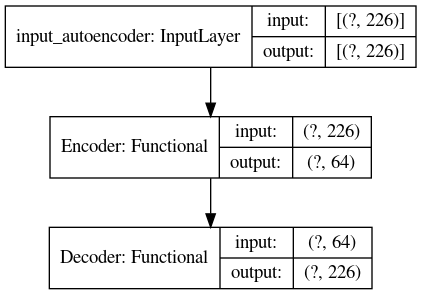

In [88]:
plot_model(autoencoder,show_shapes=True)

In [89]:
adam = Adam(lr=1e-20)
autoencoder.compile(optimizer=adam,loss='mae')

In [90]:

history = autoencoder.fit(test_transaction.iloc[ :10000 ,:], test_transaction.iloc[ :10000 ,:],
                          batch_size = 300,
                          validation_split = 0.2,
                          epochs= 100,
                          verbose=1,
                          callbacks=[lrr])

Epoch 1/100
27/27 [==============================] - 2s 63ms/step - loss: 82988.1250 - val_loss: 83664.6875
Epoch 2/100
27/27 [==============================] - 1s 53ms/step - loss: 82988.1250 - val_loss: 83664.5156
Epoch 3/100
27/27 [==============================] - 2s 62ms/step - loss: 82988.1328 - val_loss: 83664.4375
Epoch 4/100
27/27 [==============================] - 1s 55ms/step - loss: 82988.1172 - val_loss: 83664.3828
Epoch 5/100
27/27 [==============================] - 1s 53ms/step - loss: 82988.1250 - val_loss: 83664.3750
Epoch 6/100
27/27 [==============================] - 1s 52ms/step - loss: 82988.1172 - val_loss: 83664.3594
Epoch 7/100
27/27 [==============================] - 1s 53ms/step - loss: 82988.1094 - val_loss: 83664.3516
Epoch 8/100
27/27 [==============================] - 1s 54ms/step - loss: 82988.1250 - val_loss: 83664.3516
Epoch 9/100
27/27 [==============================] - 1s 54ms/step - loss: 82988.1016 - val_loss: 83664.3438
Epoch 10/100
27/27 [========

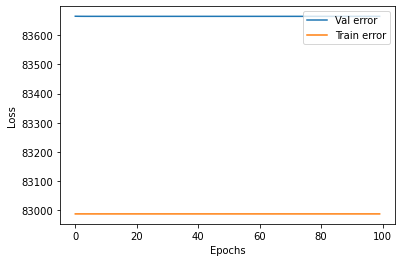

In [91]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [92]:
input_model = Input(64,name = 'input_layer')

classifier = Dense(64, activation='relu')(input_model)
classifier = Dense(32, activation='relu')(classifier)
output = Dense(2, activation='sigmoid')(classifier)

classifier = Model(inputs= [input_model], outputs=[output])
classifier.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 6,306
Trainable params: 6,306
Non-trainable params: 0
_________________________________________________________________


In [93]:
sgd=SGD(lr=0.0001, momentum=0.9)
classifier.compile(optimizer=sgd, loss='mae' , metrics=['accuracy'])

In [94]:
lrr=ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=2, 
                       min_lr=1e-8)

In [95]:
latent_vector=Encoder.predict(train_transaction[:10000])
history = classifier.fit(latent_vector ,y[:10000],
               batch_size = 128,
               validation_split = 0.2,
               epochs= 100,
               verbose=1,
               callbacks=[lrr]
               )

Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9565 - val_loss: 0.0481 - val_accuracy: 0.9405
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9685 - val_loss: 0.0450 - val_accuracy: 0.9485
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9724 - val_loss: 0.0428 - val_accuracy: 0.9510
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9729 - val_loss: 0.0421 - val_accuracy: 0.9520
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9736 - val_loss: 0.0417 - val_accuracy: 0.9520
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9737 - val_loss: 0.0413 - val_accuracy: 0.9520
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9737 - val_loss: 0.0409 - val_accuracy: 0.9525
Epoch 8/100
6

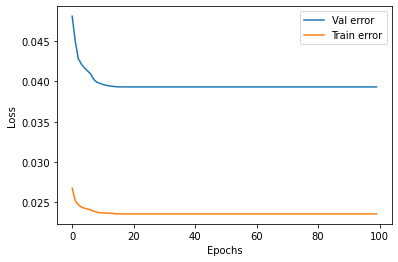

In [96]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('classifier_plot_error.png')
plt.show()

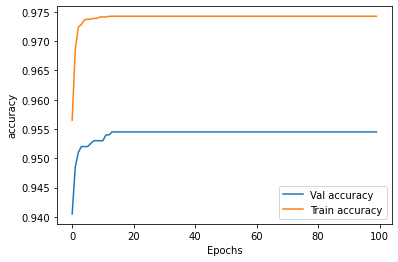

In [97]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig( 'classifier_plot_accuracy.png')
plt.show()

In [98]:
predicted_latentvec=Encoder.predict(test_transaction)
predicted=classifier.predict(predicted_latentvec)
predicted

array([[0.494306  , 0.49350336],
       [0.47192615, 0.47305048],
       [0.49208066, 0.49155796],
       ...,
       [0.49464092, 0.5910552 ],
       [0.49327207, 0.5877091 ],
       [0.49287757, 0.5856948 ]], dtype=float32)